# Load Data From Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Libraries


In [ ]:
!pip install -U yellowbrick


     |████████████████████████████████| 266kB 1.4MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.sparse import coo_matrix, vstack

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

from sklearn.manifold import TSNE

from yellowbrick.cluster import KElbowVisualizer

from gensim.models import word2vec, Word2Vec
from gensim.models.word2vec import Text8Corpus

from nltk.cluster import KMeansClusterer
import nltk

from bokeh.plotting import ColumnDataSource

from scipy import sparse as sp

import datetime

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import multiprocessing
import itertools
import string
import re
import sys
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#run before

In [ ]:
def elbow():
  model = KMeans()
  elbow_visualizer = KElbowVisualizer(model, k=(4,20))

  elbow_visualizer.fit(data)
  elbow_visualizer.show()

In [ ]:
for month in range(4,9):
  for date in range(1,30,5):
    datebeingrun = '{}_{}_16'.format(month,date)
    isfile = os.path.isfile("/content/drive/My Drive/tweetsbydates/tweet{}.csv".format(datebeingrun))
    if(isfile == False): continue

    print(datebeingrun)
    dataNew = pd.read_csv("/content/drive/My Drive/tweetsbydates/tweet{}.csv".format(datebeingrun))

    dataNew['publish_date'] = pd.to_datetime(dataNew.publish_date)

    dataNew = dataNew.sort_values(by=['publish_date'])

    dateMN = dataNew['publish_date'].min()
    dateMX = dataNew['publish_date'].max()

    #----------------- figure ------------------#

    hillarytweet = pd.read_csv('/content/drive/My Drive/politicalfiguretweets/hillarytweets.csv')
    trumptweet = pd.read_csv('/content/drive/My Drive/politicalfiguretweets/trumptweets.csv')

    hillarytweet['time'] =pd.to_datetime(hillarytweet.time)
    trumptweet['time'] =pd.to_datetime(trumptweet.time)

    datestart = dateMN.to_pydatetime() - datetime.timedelta(2)
    dateend = dateMX.to_pydatetime()

    hillaryrangetweets = hillarytweet.loc[(hillarytweet['time'] > datestart) & (hillarytweet['time'] < dateend),['time','stopword']]
    trumprangetweets = trumptweet.loc[(trumptweet['time'] > datestart) & (trumptweet['time'] < dateend),['time','stopword']]

    #-------------- data concat ---------------#
    '''data, hillarytweet and trump tweet needs to concatenated'''

    trumpstart = len(dataNew['stopword'])
    hillarystart = len(trumprangetweets['stopword']) + trumpstart

    '''
    print("start {}".format(trumpstart))
    print(len(trumprangetweets['stopword']))
    print(hillarystart)
    '''

    dataAll = pd.concat([dataNew['stopword'], trumprangetweets['stopword'], hillaryrangetweets['stopword']])

    #----------------- tfidf ------------------#

    tfidf = TfidfVectorizer(
        min_df = 5,
        max_df = 0.95,
        max_features = 150,
        stop_words = 'english'
    )
    tfidf.fit(dataAll)
    data = tfidf.transform(dataAll)
    dataMatrix  = tfidf.fit_transform(dataAll)
    dataden = dataMatrix.todense()

    #testclusters

    elbow()
    

In [ ]:
datebeingrun = '4_16_16'

In [ ]:
dataNew = pd.read_csv("/content/drive/My Drive/tweetsbydates/tweet{}.csv".format(datebeingrun))

dataNew['publish_date'] = pd.to_datetime(dataNew.publish_date)

dataNew = dataNew.sort_values(by=['publish_date'])
dataNew = dataNew

print(dataNew['publish_date'].min())
print(dataNew['publish_date'].max())

dateMN = dataNew['publish_date'].min()
dateMX = dataNew['publish_date'].max()

2016-04-16 00:02:00
2016-04-20 23:59:00


# Preprocessing

In [ ]:
hillarytweet = pd.read_csv('/content/drive/My Drive/politicalfiguretweets/hillarytweets.csv')
trumptweet = pd.read_csv('/content/drive/My Drive/politicalfiguretweets/trumptweets.csv')

hillarytweet['time'] =pd.to_datetime(hillarytweet.time)
trumptweet['time'] =pd.to_datetime(trumptweet.time)

datestart = dateMN.to_pydatetime() - datetime.timedelta(2)
dateend = dateMX.to_pydatetime()

hillaryrangetweets = hillarytweet.loc[(hillarytweet['time'] > datestart) & (hillarytweet['time'] < dateend),['time','stopword']]
trumprangetweets = trumptweet.loc[(trumptweet['time'] > datestart) & (trumptweet['time'] < dateend),['time','stopword']]


In [ ]:
print(hillaryrangetweets.shape)
print(trumprangetweets.shape)

(68, 2)
(64, 2)


# Word Embeddings


In [ ]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 150,
    stop_words = 'english'
)

start = len(dataNew['stopword'])

dataTrump = pd.concat([dataNew['stopword'], trumprangetweets['stopword']])
dataHillary = pd.concat([dataNew['stopword'], hillaryrangetweets['stopword']])

tfidf.fit(dataNew['stopword'])
data = tfidf.transform(dataNew['stopword'])

tfidf.fit(dataTrump)
tranTrump = tfidf.transform(dataTrump)
tranMatrixTrump  = tfidf.fit_transform(dataTrump)
trandenTrump = dataMatrix.todense()

tfidf.fit(dataHillary)
tranHillary = tfidf.transform(dataHillary)
tranMatrixHillary  = tfidf.fit_transform(dataHillary)
trandenHillary = dataMatrix.todense()


# Clustering


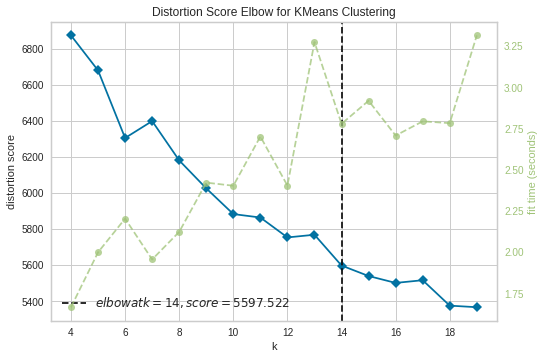

In [ ]:
model = KMeans()
elbow_visualizer = KElbowVisualizer(model, k=(4,20))

elbow_visualizer.fit(data)
elbow_visualizer.show()

In [ ]:
bestk = 14
km_model = KMeans(n_clusters=bestk,n_jobs=-1,random_state=91898)
km_model.fit(data)
y_kmeans = km_model.fit_predict(data)
#print(y_kmeans)

#print(dataden)
#print(km_model.labels_)

data2D = PCA(n_components=2).fit_transform(dataden)

In [ ]:
trumpdata = tfidf.transform(trumprangetweets['stopword'])
#trumpdataMatrix = tfidf.fit_transform(trumprangetweets['stopword'])

trump_cluster = km_model.fit_predict(trumpdata)
trump_clusterden = trumpdata.todense()

hillarydata = tfidf.transform(hillaryrangetweets['stopword'])

hillary_cluster = km_model.fit_predict(hillarydata)
hillary_clusterden = hillarydata.todense()

hillarydata2D = PCA(n_components=2).fit_transform(hillary_clusterden)
trumpdata2D = PCA(n_components=2).fit_transform(trump_clusterden)


In [ ]:
dataAll = vstack([data,trumpdata,hillarydata])
all_kmeans = km_model.fit_predict(dataAll)

datadenAll = np.concatenate([dataden,hillary_clusterden,trump_clusterden])
dataAll2d = PCA(n_components=2).fit_transform(datadenAll)

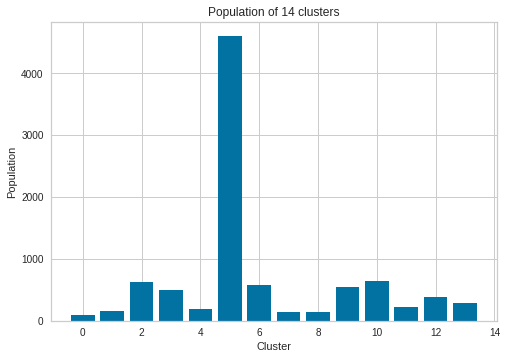

In [ ]:
plt.bar(range(len(set(km_model.labels_))), np.bincount(km_model.labels_))

plt.title("Population of {} clusters from {} to {}".format(bestk,dateMN,dateMX))
plt.ylabel('Population')
plt.xlabel('Cluster')
plt.savefig('/content/drive/My Drive/savedfigure/Cluster{}Population.png'.format(datebeingrun))

#graph

In [ ]:
#Colors
color_names = []
for name, hex in matplotlib.colors.cnames.items():
    color_names.append(name)

color_names = ['red', 'yellow', 'green', 'cyan', 'blue', 'magenta','orange',
               'brown','purple','gold','lime','indigo','tan','khaki',
               'saddlebrown','forestgreen','silver','deeppink','plum','lavender']


(9112, 2)


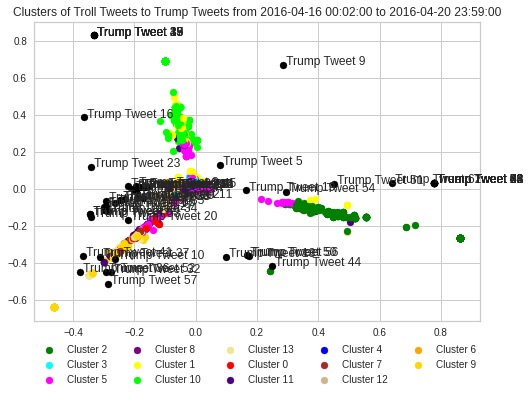

In [ ]:
fig, ax = plt.subplots()
color_map = []

label_set = []
print(data2D.shape)

for index, instance in enumerate(data2D):
      # print instance, index, labels[index]
      pca_comp_1 = np.asarray(data2D[index])[0]
      pca_comp_2 = np.asarray(data2D[index])[1] 
      if(y_kmeans[index] in label_set):
        ax.scatter(pca_comp_1, pca_comp_2, c=color_names[y_kmeans[index]])
      else:
        ax.scatter(pca_comp_1, pca_comp_2, c=color_names[y_kmeans[index]],label="Cluster {}".format(y_kmeans[index]))
        label_set.append(y_kmeans[index])
#----------------------------#

for index, instance in enumerate(trumpdata2D):
      # print instance, index, labels[index]
      pca_comp_1 = np.asarray(trumpdata2D[index])[0]
      pca_comp_2 = np.asarray(trumpdata2D[index])[1] 
      ax.scatter(pca_comp_1, pca_comp_2, c='black')
      ax.annotate(" Trump Tweet {}".format(index),(pca_comp_1, pca_comp_2))

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.title('Clusters of Troll Tweets to Trump Tweets from {} to {}'.format(dateMN,dateMX))
plt.savefig('/content/drive/My Drive/savedfigure/Cluster{}FigToTrump.png'.format(datebeingrun))
plt.show()


(9112, 2)


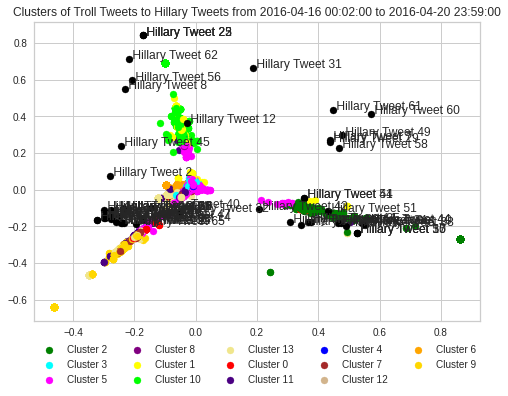

In [ ]:
fig, ax = plt.subplots()
color_map = []

label_set = []
print(data2D.shape)

for index, instance in enumerate(data2D):
      # print instance, index, labels[index]
      pca_comp_1 = np.asarray(data2D[index])[0]
      pca_comp_2 = np.asarray(data2D[index])[1] 
      if(y_kmeans[index] in label_set):
        ax.scatter(pca_comp_1, pca_comp_2, c=color_names[y_kmeans[index]])
      else:
        ax.scatter(pca_comp_1, pca_comp_2, c=color_names[y_kmeans[index]],label="Cluster {}".format(y_kmeans[index]))
        label_set.append(y_kmeans[index])
#----------------------------#

for index, instance in enumerate(hillarydata2D):
      # print instance, index, labels[index]
      pca_comp_1 = np.asarray(hillarydata2D[index])[0]
      pca_comp_2 = np.asarray(hillarydata2D[index])[1] 
      ax.scatter(pca_comp_1, pca_comp_2, c='black')
      ax.annotate(" Hillary Tweet {}".format(index),(pca_comp_1, pca_comp_2))

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.title('Clusters of Troll Tweets to Hillary Tweets from {} to {}'.format(dateMN,dateMX))
plt.savefig('/content/drive/My Drive/savedfigure/Cluster{}FigToHillary.png'.format(datebeingrun))
plt.show()

(9112, 2)


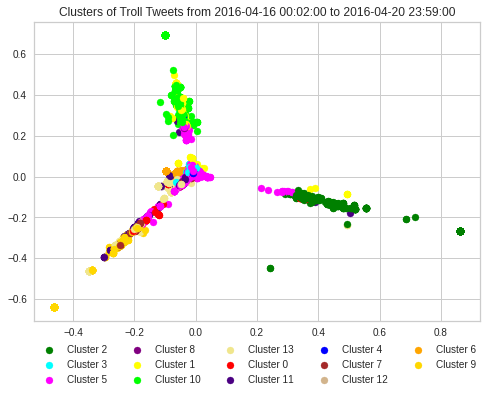

In [ ]:
fig, ax = plt.subplots()
color_map = []

label_set = []
print(data2D.shape)

for index, instance in enumerate(data2D):
      # print instance, index, labels[index]
      pca_comp_1 = np.asarray(data2D[index])[0]
      pca_comp_2 = np.asarray(data2D[index])[1] 
      if(y_kmeans[index] in label_set):
        ax.scatter(pca_comp_1, pca_comp_2, c=color_names[y_kmeans[index]])
      else:
        ax.scatter(pca_comp_1, pca_comp_2, c=color_names[y_kmeans[index]],label="Cluster {}".format(y_kmeans[index]))
        label_set.append(y_kmeans[index])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.title('Clusters of Troll Tweets from {} to {}'.format(dateMN,dateMX))
plt.savefig('/content/drive/My Drive/savedfigure/Cluster{}FigWithOutTweets.png'.format(datebeingrun))
plt.show()

(9112, 2)


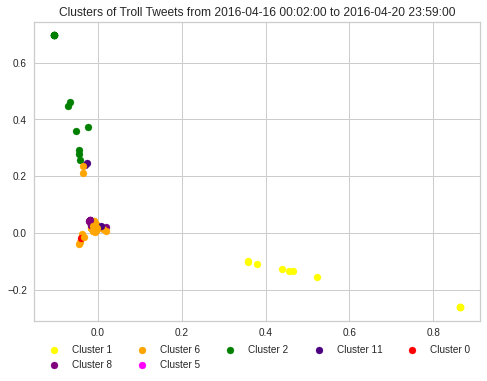

In [ ]:
fig, ax = plt.subplots()
color_map = []

label_set = []
print(data2D.shape)

for index, instance in enumerate(dataAll2d[9112:]):
      # print instance, index, labels[index]
      pca_comp_1 = np.asarray(dataAll2d[index])[0]
      pca_comp_2 = np.asarray(dataAll2d[index])[1] 
      if(all_kmeans[index] in label_set):
        ax.scatter(pca_comp_1, pca_comp_2, c=color_names[all_kmeans[index]])
      else:
        ax.scatter(pca_comp_1, pca_comp_2, c=color_names[all_kmeans[index]],label="Cluster {}".format(all_kmeans[index]))
        label_set.append(all_kmeans[index])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.title('Clusters of Troll Tweets from {} to {}'.format(dateMN,dateMX))
plt.savefig('/content/drive/My Drive/savedfigure/Cluster{}FigWithOutTweets.png'.format(datebeingrun))
plt.show()